# Similarity
Yiting (Elle) Tsai (yt9mh@virginia.edu)<br>
DS 5001<br>
28 April 2020<br>

## Overview
1.  Aim to see the similarity between differents document, different dates and different social media companies
2.  By using hierarchical clustering and K mean clustering, we can see if difference between the different time periods

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

/Users/ellesmac/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import nltk
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) 
tokenizer = nltk.RegexpTokenizer(r"\w+") # remove punctuation

In [3]:
df = pd.read_csv('covid19_news.csv')
df['doc_date'] = pd.to_datetime(df['doc_date'])
df.head()

,doc_content,doc_date,doc_id,doc_source,doc_title,doc_url,doc_lemma
0,By YANAN WANG and MIKE STOBBE\nBEIJING (AP) — ...,2020-01-08,983556,US News,Chinese Report Says Illnesses May Be From New ...,https://www.usnews.com/news/world/articles/202...,yanan wang mike stobbe beijing ( ap ) — prelim...
1,BEIJING (AP) — Health authorities in a central...,2020-01-10,985558,US News,China Reports 1st Death From New Type of Coron...,https://www.usnews.com/news/health-news/articl...,beijing ( ap ) — health authority central chin...
2,Here are some of the latest health and medical...,2020-01-13,987316,US News,"Health Highlights: Jan. 13, 2020",https://www.usnews.com/news/health-news/articl...,"late health medical news development , compile..."
3,Here are some of the latest health and medical...,2020-01-14,988361,US News,"Health Highlights: Jan. 14, 2020",https://www.usnews.com/news/health-news/articl...,"late health medical news development , compile..."
4,"By MARI YAMAGUCHI, Associated Press\nTOKYO (AP...",2020-01-16,989997,US News,Patient in Japan Confirmed as Having New Virus...,https://www.usnews.com/news/world/articles/202...,"mari yamaguchi , associate press tokyo ( ap ) ..."


## Create TFIDF Table


In [4]:
def create_tfidf(df):
    vectorizer = TfidfVectorizer(lowercase = True, stop_words = 'english', analyzer = 'word')

    tfidf = vectorizer.fit_transform(df['doc_lemma'])
    tfidf_df = pd.DataFrame(tfidf.toarray()) #df
    tfidf_array = tfidf.toarray() # array
    tfidf_norm = normalize(tfidf) # normalize array
    tfidf_norm = tfidf_norm.toarray()
    
    return tfidf_df, tfidf_array, tfidf_norm, vectorizer

In [5]:
tfidf, tfidf_array, tfidf_norm, v = create_tfidf(df)
TFIDF = pd.concat([df[['doc_id']], tfidf], axis = 1)
TFIDF.set_index('doc_id', inplace = True)
TFIDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,36120,36121,36122,36123,36124,36125,36126,36127,36128,36129,36130,36131,36132,36133,36134,36135,36136,36137,36138,36139,36140,36141,36142,36143,36144,36145,36146,36147,36148,36149,36150,36151,36152,36153,36154,36155,36156,36157,36158,36159,36160,36161,36162,36163,36164,36165,36166,36167,36168,36169,36170,36171,36172,36173,36174,36175,36176,36177,36178,36179,36180,36181,36182,36183,36184,36185,36186,36187,36188,36189,36190,36191,36192,36193,36194,36195,36196,36197,36198,36199,36200,36201,36202,36203,36204,36205,36206,36207,36208,36209,36210,36211,36212,36213,36214,36215,36216,36217,36218,36219,36220,36221,36222,36223,36224,36225,36226,36227,36228,36229,36230,36231,36232,36233,36234,36235,36236,36237,36238,36239,36240,36241,36242,36243,36244,36245,36246,36247,36248,36249,36250,36251,36252,36253,36254,36255,36256,36257,36258,36259,36260,36261,36262,36263,36264,36265,36266,36267,36268,36269,36270,36271,36272,36273,36274,36275,36276,36277,36278,36279,36280,36281,36282,36283,36284,36285,36286,36287,36288,36289,36290,36291,36292,36293,36294,36295,36296,36297,36298,36299,36300,36301,36302,36303,36304,36305,36306,36307,36308,36309,36310,36311,36312,36313,36314,36315,36316,36317,36318,36319,36320,36321,36322,36323,36324,36325,36326,36327,36328,36329,36330,36331,36332,36333,36334,36335,36336,36337,36338,36339,36340,36341,36342,36343,36344,36345,36346,36347,36348,36349,36350,36351,36352,36353,36354,36355,36356,36357,36358,36359,36360,36361,36362,36363,36364,36365,36366,36367,36368,36369
doc_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
983556,0.0,0.021115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Compute distance - based on articles
From the table below, we can see the distance between each news article is relatively 0, which is reasonable since the articles are all related to coronavirus. Therefore, it would be interesting to see the similarity by date and by company. That is, to see if there is any similarity between news during January to March and based on the same topic, is there any difference between each news company articles

### Create a DOC table

In [9]:
doc = df[['doc_id', 'doc_title']]
doc.index.name = 'id'
doc.head()

,doc_id,doc_title
id,,
0,983556,Chinese Report Says Illnesses May Be From New ...
1,985558,China Reports 1st Death From New Type of Coron...
2,987316,"Health Highlights: Jan. 13, 2020"
3,988361,"Health Highlights: Jan. 14, 2020"
4,989997,Patient in Japan Confirmed as Having New Virus...


### Create Normalize Table

In [65]:
L0 = TFIDF.astype('bool').astype('int')
L1 = TFIDF.apply(lambda x: x / x.sum(), 1)
L2 = TFIDF.apply(lambda x: x / norm(x), 1)

In [10]:
def get_pairs(doc):
    
    PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([doc.index.tolist(), doc.index.tolist()])).reset_index()
    PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
    return PAIRS

In [11]:
PAIRS = get_pairs(doc)
PAIRS.index.names = ['doc_a', 'doc_b']

PAIRS.head()

Empty DataFrame
Columns: []
Index: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

In [126]:
def similarity_distance(PAIRS, TFIDF, L0):
    PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')
    PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')
    PAIRS['cosine'] = pdist(TFIDF, 'cosine')
    PAIRS['jaccard'] = pdist(L0, 'jaccard')
    PAIRS['hamming'] = pdist(TFIDF, 'hamming')
    return PAIRS

In [87]:
PAIRS = similarity_distance(PAIRS, TFIDF, L0)
PAIRS.sort_values('hamming').head(10).style.background_gradient('YlGn', high=1)

In [76]:
PAIRS.sum(axis = 0)

cityblock    2.036560e+08
euclidean    1.464591e+07
cosine       1.006240e+07
jaccard      9.887701e+06
hamming      1.061054e+05
dtype: float64

## Compute distance - based on date

In [6]:
date_df = df.groupby('doc_date').agg({'doc_lemma' : lambda x: ','.join(x),
                                     'doc_id': 'count'}).reset_index()
date_df.rename(columns = {'doc_id': 'doc_count'}, inplace = True)
date_df.head()

,doc_date,doc_lemma,doc_count
0,2020-01-08,yanan wang mike stobbe beijing ( ap ) — prelim...,1
1,2020-01-10,beijing ( ap ) — health authority central chin...,1
2,2020-01-13,"late health medical news development , compile...",1
3,2020-01-14,"late health medical news development , compile...",1
4,2020-01-16,"mari yamaguchi , associate press tokyo ( ap ) ...",1


In [7]:
# create tfidf table
date_tfidf, date_tfidf_array, date_tfidf_norm, date_v = create_tfidf(date_df)
date_TFIDF = pd.concat([date_df[['doc_date']], date_tfidf], axis = 1)
date_TFIDF.set_index('doc_date', inplace = True)
date_TFIDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,36120,36121,36122,36123,36124,36125,36126,36127,36128,36129,36130,36131,36132,36133,36134,36135,36136,36137,36138,36139,36140,36141,36142,36143,36144,36145,36146,36147,36148,36149,36150,36151,36152,36153,36154,36155,36156,36157,36158,36159,36160,36161,36162,36163,36164,36165,36166,36167,36168,36169,36170,36171,36172,36173,36174,36175,36176,36177,36178,36179,36180,36181,36182,36183,36184,36185,36186,36187,36188,36189,36190,36191,36192,36193,36194,36195,36196,36197,36198,36199,36200,36201,36202,36203,36204,36205,36206,36207,36208,36209,36210,36211,36212,36213,36214,36215,36216,36217,36218,36219,36220,36221,36222,36223,36224,36225,36226,36227,36228,36229,36230,36231,36232,36233,36234,36235,36236,36237,36238,36239,36240,36241,36242,36243,36244,36245,36246,36247,36248,36249,36250,36251,36252,36253,36254,36255,36256,36257,36258,36259,36260,36261,36262,36263,36264,36265,36266,36267,36268,36269,36270,36271,36272,36273,36274,36275,36276,36277,36278,36279,36280,36281,36282,36283,36284,36285,36286,36287,36288,36289,36290,36291,36292,36293,36294,36295,36296,36297,36298,36299,36300,36301,36302,36303,36304,36305,36306,36307,36308,36309,36310,36311,36312,36313,36314,36315,36316,36317,36318,36319,36320,36321,36322,36323,36324,36325,36326,36327,36328,36329,36330,36331,36332,36333,36334,36335,36336,36337,36338,36339,36340,36341,36342,36343,36344,36345,36346,36347,36348,36349,36350,36351,36352,36353,36354,36355,36356,36357,36358,36359,36360,36361,36362,36363,36364,36365,36366,36367,36368,36369
doc_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-08,0.0,0.028006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [135]:
# create doc
date_doc = date_df[['doc_date']]
date_doc.index.name = 'id'
date_doc.head()

,doc_date
id,
0,2020-01-08
1,2020-01-10
2,2020-01-13
3,2020-01-14
4,2020-01-16


In [136]:
# create normalization
date_L0 = date_TFIDF.astype('bool').astype('int')
date_L1 = date_TFIDF.apply(lambda x: x / x.sum(), 1)
date_L2 = date_TFIDF.apply(lambda x: x / norm(x), 1)

In [141]:
date_PAIRS = get_pairs(date_doc)
date_PAIRS.index.names = ['date_a', 'date_b']
date_PAIRS.shape

(2850, 0)

In [142]:
date_PAIRS = similarity_distance(date_PAIRS, date_TFIDF, date_L0)
date_PAIRS.sort_values('hamming').head(10).style.background_gradient('YlGn', high=1)

### Hierarchical clustering

In [172]:
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
#     labels = date_doc[label_col].values
    labels = list(date_doc['doc_date'].apply(lambda x: str(x.date())))
    plt.figure();
    fig, axes = plt.subplots(figsize=figsize);
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    
    plt.tick_params(axis='both', which='major', labelsize=10);
    

<Figure size 432x288 with 0 Axes>

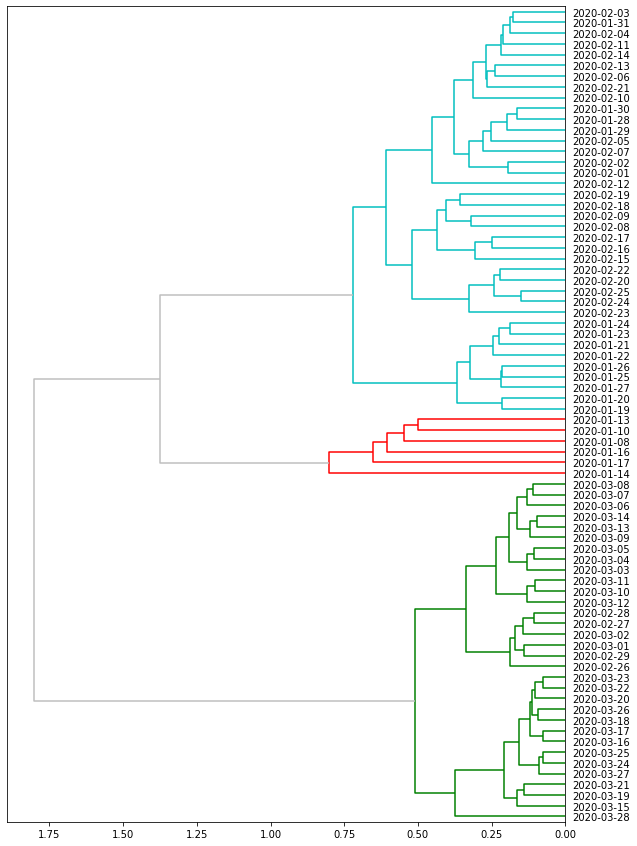

In [173]:
hca(date_PAIRS.cosine, color_thresh=1, figsize=(10, 15))

From the dendrogram above,  we can see that news articles in the same month will have similar news, which is reasonable since news are reporting the latest incidents. As looked more carefully in March (group in green color), it can be divided into two groups, before March 15, 2020 and after. It reflects the WHO announcement has influenced the news articles.


## Compute distance - based on company in same date
Based on 2020-03-13, which is the most articles published per day in our dataset, as the date to analyze the similarity between the company's news articles, we can see CNN and Breitbart have the most similar reports.

In [14]:
c_df = df[df['doc_date'] == '2020-03-13']
c_df = c_df.groupby('doc_source').agg({'doc_lemma' : lambda x: ','.join(x),
                                     'doc_id': 'count'}).reset_index()
c_df.rename(columns = {'doc_id': 'doc_count'}, inplace = True)
c_df

,doc_source,doc_lemma,doc_count
0,Breitbart,president donald trump declare national state ...,66
1,CNN,washington ( cnn ) president donald trump say ...,27
2,Fox,closevideopresident trump declares national em...,24
3,Politico Magazine,congressional leader snip way coronavirus cris...,5
4,PowerLine,( john hinderaker ) bernie sander say coronavi...,12
5,US News,"paul j. weber , associate press austin , texas...",120


In [15]:
# create tfidf table
c_tfidf, c_tfidf_array, c_tfidf_norm, c_v = create_tfidf(c_df)
c_TFIDF = pd.concat([c_df[['doc_source']], c_tfidf], axis = 1)
c_TFIDF.set_index('doc_source', inplace = True)
c_TFIDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,9199,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215,9216,9217,9218,9219,9220,9221,9222,9223,9224,9225,9226,9227,9228,9229,9230,9231,9232,9233,9234,9235,9236,9237,9238,9239,9240,9241,9242,9243,9244,9245,9246,9247,9248,9249,9250,9251,9252,9253,9254,9255,9256,9257,9258,9259,9260,9261,9262,9263,9264,9265,9266,9267,9268,9269,9270,9271,9272,9273,9274,9275,9276,9277,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287,9288,9289,9290,9291,9292,9293,9294,9295,9296,9297,9298,9299,9300,9301,9302,9303,9304,9305,9306,9307,9308,9309,9310,9311,9312,9313,9314,9315,9316,9317,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361,9362,9363,9364,9365,9366,9367,9368,9369,9370,9371,9372,9373,9374,9375,9376,9377,9378,9379,9380,9381,9382,9383,9384,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394,9395,9396,9397,9398,9399,9400,9401,9402,9403,9404,9405,9406,9407,9408,9409,9410,9411,9412,9413,9414,9415,9416,9417,9418,9419,9420,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430,9431,9432,9433,9434,9435,9436,9437,9438,9439,9440,9441,9442,9443,9444,9445,9446,9447,9448
doc_source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Breitbart,0.022312,0.027176,0.003401,0.003401,0.0,0.000000,0.0,0.003401,0.0,0.0,0.002789,0.000000,0.0,0.0,0.003401,0.021137,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.022646,0.002355,0.003401,0.000000,0.0,0.0,0.003401,0.000000,0.000000,0.000000,0.0,0.003401,0.051332,0.000000,0.0,0.0,0.000000,0.000000,0.009419,0.0,0.002789,0.003401,0.010203,0.083640,0.0,0.002789,0.000000,0.000000,0.000000,0.002789,0.002789,0.000000,0.010089,0.002355,0.000000,0.018160,0.000000,0.0,0.0,0.002789,0.000000,0.004709,0.002789,0.000000,0.000000,0.003401,0.007064,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.003401,0.000000,0.0,0.000000,0.000000,0.084547,0.002789,0.000000,0.000000,0.000000,0.0,0.002789,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.002789,0.000000,0.003401,0.004709,0.0,0.000000,0.003401,0.000000,0.0,0.000000,0.003401,0.003401,0.010455,0.004036,0.004709,0.000000,0.000000,0.000000,0.002355,0.003401,0.000000,0.002018,0.000000,0.000000,0.000000,0.0,0.006802,0.000000,0.000000,0.000000,0.012107,0.004036,0.125310,0.000000,0.004709,0.002789,0.0,0.002789,0.0,0.002789,0.008367,0.000000,0.0,0.002789,0.0,0.008071,0.003401,0.0,0.003401,0.003401,0.014128,0.0,0.0,0.000000,0.001742,0.000000,0.0,0.003401,0.006053,0.0,0.0,0.0,0.003401,0.005578,0.0,0.0,0.002018,0.005227,0.000000,0.006802,0.003401,0.003401,0.003401,0.003401,0.003401,0.003401,0.0,

In [184]:
# create doc
c_doc = c_df[['doc_source']]
c_doc.index.name = 'id'
c_doc.head()

,doc_source
id,
0,Breitbart
1,CNN
2,Fox
3,Politico Magazine
4,PowerLine


In [185]:
# create normalization
c_L0 = c_TFIDF.astype('bool').astype('int')
c_L1 = c_TFIDF.apply(lambda x: x / x.sum(), 1)
c_L2 = c_TFIDF.apply(lambda x: x / norm(x), 1)

In [186]:
c_PAIRS = get_pairs(c_doc)
c_PAIRS.index.names = ['source_a', 'source_b']
c_PAIRS.shape

(15, 0)

In [187]:
c_PAIRS = similarity_distance(c_PAIRS, c_TFIDF, c_L0)
c_PAIRS.sort_values('hamming').head(10).style.background_gradient('YlGn', high=1)

### Hierarchical clustering

In [196]:
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = c_doc['doc_source'].values
    plt.figure();
    fig, axes = plt.subplots(figsize=figsize);
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    
    plt.tick_params(axis='both', which='major', labelsize=10);
    

<Figure size 432x288 with 0 Axes>

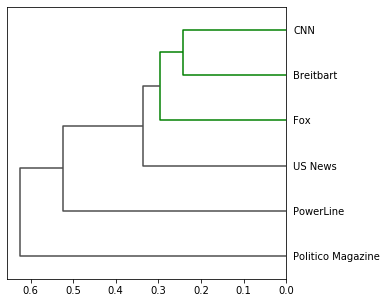

In [204]:
hca(c_PAIRS.cosine, figsize=(5, 5))

From the graph we can see CNN and Breitbart have the most similar articles

# K means clustering

Based on Date. We can see that the first four principal components explains over 38% of the variation in the data.
Reference: https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

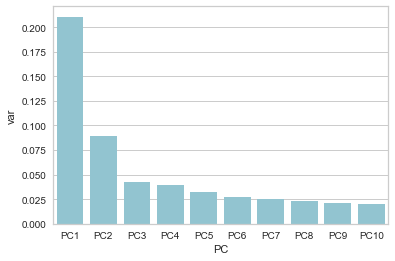

In [8]:
sklearn_pca = PCA(n_components = 10) # use PCA to reduce dimension
pca = sklearn_pca.fit_transform(date_tfidf_norm)

pc = pd.DataFrame({'var':sklearn_pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']})
sns.barplot(x='PC',y="var", 
           data=pc, color="c");

In [49]:
pc_df = pd.DataFrame(data = pca , 
        columns = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
X_pca = pc_df.iloc[:,:2]
X_pca.head()


,PC1,PC2
0,-0.273852,0.420693
1,-0.260087,0.528179
2,-0.277094,0.662538
3,-0.185430,0.714861
4,-0.220187,0.475575


From below graph, distortion score is the sum of square of clustering. As k = 4 is the elbow of score, I will then cluster the news source to 4 groups. From the scatter plot, the classification is well separate in each group

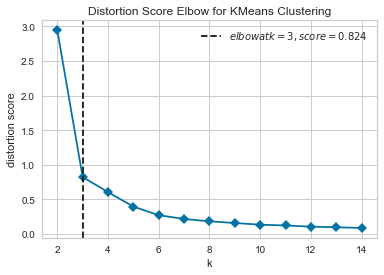

In [50]:
model = KMeans(max_iter=500, algorithm = 'auto')
visualizer = KElbowVisualizer(model, k=(2,15), timings=False, locate_elbow=True)

visualizer.fit(X_pca)       # kmeans elbow visualization shows the best cluster number    
visualizer.show();        

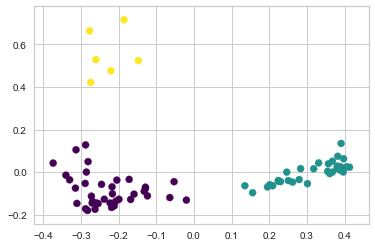

In [54]:
kmeans = KMeans(n_clusters=3, max_iter=500, algorithm = 'auto').fit(X_pca)
y_pred = kmeans.predict(X_pca)
y_pred_str = [",".join(item) for item in y_pred.astype(str)]

# fig = px.scatter(r, 'PC0','PC1', color = 'y_pred', hover_name = 'doc_date') # plotly
# fig.show()

plt.scatter(pca[:, 0], pca[:, 1], c=y_pred, s=50, cmap='viridis'); # matplotlibb

In [56]:
# r = pd.DataFrame(list(zip(pca[:, 0], pca[:, 1])), columns = ['PC0', 'PC1'])
# r['y_pred'] = [",".join(item) for item in y_pred.astype(str)]
# r['doc_date'] = date_df['doc_date']
# r.head()

# fig = px.scatter(r, 'PC0','PC1', color = 'y_pred', hover_name = 'doc_date') # plotly
# fig.show()

We can clearly see four clusters are separated in our data. The three principal components are able to completely separate the clusters.

In [72]:
def get_top_features_cluster(tfidf, prediction, n_feats, vectorizer):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tfidf[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [74]:
dfs = get_top_features_cluster(date_tfidf_norm, y_pred, 15, date_v)

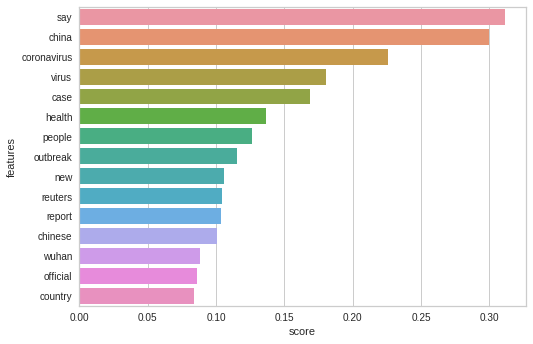

In [75]:
sns.barplot('score', 'features', data = dfs[0]);

Graph above shows the top 15 words in the first principal component, calculated by the mean of tfidf score